## Basic preprocessing

In [16]:
from PyPerMANOVA import permutational_analysis

import sklearn.datasets
import seaborn as sns
import pandas as pd

def make_groups(n_clusters = 3,
                d_differences = [2,-2],
                n_features = 4,
                samples_per_cluster = 20,
                random_state = 42,
                draw=True,
                **kwargs
                ):

    first_center = tuple(0 for i in range(n_features))
    centers = [first_center] + [tuple(x+d for x in first_center) for d in d_differences]
    centers = centers[:n_clusters] 
    
    raw_data = sklearn.datasets.make_blobs(n_samples=samples_per_cluster*n_clusters,
                                           n_features=n_features,
                                           centers=centers,
                                           random_state = random_state,
                                           **kwargs
                                           )
    
    raw_df = pd.DataFrame(data  = raw_data[0],
                          index = raw_data[1],
                          columns = [f"feature_{i+1}" for i in range(raw_data[0].shape[1])])
    raw_df.index = raw_df.index.astype(str)
    if draw:
        #draw dataframe
        sns.scatterplot(data=raw_df,x="feature_1",y="feature_2",hue=raw_df.index)
        
    return(raw_df)

## Basics of PyPerMANOVA for every dataset

The basic function from PyPerMANOVA is `permutational_analysis`.
It takes the following arguments:
 - `data` - a numerical pandas DataFrame
 - `mapping` - object of various types, used to partition data into groups
 - `column` - when `mapping` is a DataFrame, the column containing the groups
 - `by` - what orientation is used to produce the distance matrix, or what axis contains groups
 - `norm` - normalize the data by which axis - row, column, or not at all (pass `norm = None` for latter case)
 - `metric` - what metric is used to quantify distance, by default it's "euclidean"
 - `permutations` - the number of permutations used to calculate P-Value
It outputs the following variables:
 - `permanova_result` - result of PerMANOVA in the form of a DataFrame
 - `posthoc_result` - result of post-hoc analysis in the form of a DataFrame
 
## Example on the dummy data

Using the above defined `make_groups` function, we'll simulate three datasets:

- One where every group is distinct
- One where one group is distinct
- One where no group is distinct

Total number of groups will be 3, each having 20 samples, and the distance from the first group
will be controlled by `d_differences` parameter.

Our simulated data contains label information in the indices, 
so we must pass `mapping = None` and `by = "row"`. We can normalize
along the columns by passing `norm = "column"` or not normalize at all by `norm=None`.
 
### Example on data when every group is different

,Pval,eta-sqr,F
0,0.001,0.456462,628.589548


,A,B,Pval,bonf,eta-sqr,cohen-d,F,t,dof
0,1,2,0.001,0.003,0.520876,2.085333,1084.968778,32.938864,997.9905661762881
1,1,0,0.001,0.003,0.273069,1.225849,374.894367,19.362189,997.9178397298181
2,2,0,0.001,0.003,0.297450,1.301385,422.538709,20.555746,997.9640816114439


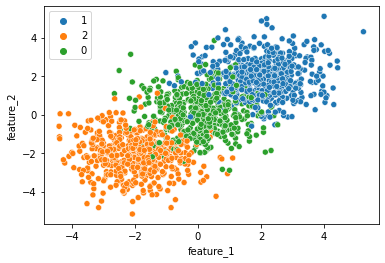

In [17]:
sample_data_alldifferent = make_groups()
perm_res,post_res = permutational_analysis(data = sample_data_alldifferent,
                                           mapping = None,
                                           norm = "column",
                                           by = "row",
                                          )
display(perm_res)
display(post_res)

Since every group is different, we can observe small P-values in PerMANOVA, and small p-values 
in bonfferoni-adjusted p-values of posthoc test. Likewise, effect sizes are very large.
For post-hoc test, the effect size of `eta-sqr` corresponds to Pearson's R<sup>2</sup>.

### Example on data when one group is different

,Pval,eta-sqr,F
0,0.001,0.286782,11.459746


,A,B,Pval,bonf,eta-sqr,cohen-d,F,t,dof
0,1,0,0.001,0.003,0.330290,1.405095,18.740978,4.329085,37.97003900090509
1,1,2,0.001,0.003,0.286899,1.269915,15.288369,3.910034,37.920324024611226
2,0,2,0.701,2.103,0.020049,0.286115,0.777442,0.881727,37.98800345431907


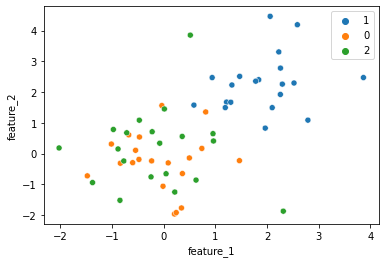

In [13]:
sample_data_onedistinct = make_groups(d_differences=[2,0])
perm_res,post_res = permutational_analysis(data = sample_data_onedistinct,
                                           mapping = None,
                                           norm = "column",
                                           by = "row",
                                          )
display(perm_res)
display(post_res)

We can observe that altough P value of PerMANOVA is still small, its `eta-sqr` lowered.
Post-hoc tests show that one group does not differ significantly from another group.

### Example on data when all groups are the same

,Pval,eta-sqr,F
0,0.692,0.028758,0.843884


,A,B,Pval,bonf,eta-sqr,cohen-d,F,t,dof
0,1,0,0.517,1.551,0.023272,0.308780,0.905423,0.951537,37.98511444669383
1,1,2,0.602,1.806,0.021920,0.299778,0.851634,0.922840,37.90652547816493
2,0,2,0.709,2.127,0.020056,0.286252,0.777739,0.881895,37.966077225416825


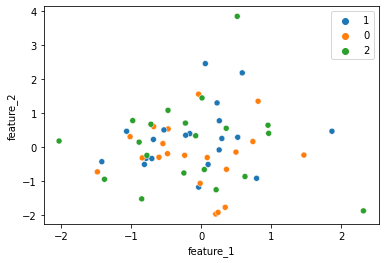

In [15]:
sample_data_allsame = make_groups(d_differences=[0,0])
perm_res,post_res = permutational_analysis(data = sample_data_allsame,
                                           mapping = None,
                                           norm = "column",
                                           by = "row",
                                          )
display(perm_res)
display(post_res)

Here, P-value in PerMANOVA is high, and so are the P-values from post hoc tests,
indicating that groups are not one from another.